# Feature Analysis for Parkinson's Disease Differentiation

The goal of this project is to find a set of specific features that can tell apart individuals with Parkinson's disease from those without it. We studied the voice recordings of 20 people with Parkinson's and 20 without, with each participant contributing 26 voice samples. These samples were then broken down into various acoustic characteristics using a software named Praat.

Learn more about Praat software:  https://www.fon.hum.uva.nl/praat/

## Data dictionary

| Column | Measurement category                | Description                                                                                                        |
|:--------|:-----------------------------------|:-------------------------------------------------------------------------------------------------------------------|
| 1       | Subject identifier                | This number identifies a study subject                                                                             |
| 2       | Jitter                            | Jitter in %                                                                                                        |
| 3       | Jitter                            | Absolute jitter in microseconds                                                                                    |
| 4       | Jitter                            | Jitter as relative amplitude perturbation (r.a.p.)                                                                 |
| 5       | Jitter                            | Jitter as 5-point period perturbation quotient (p.p.q.5)                                                           |
| 6       | Jitter                            | Jitter as average absolute difference of differences between jitter cycles (d.d.p.)                                |
| 7       | Shimmer                           | Shimmer in %                                                                                                       |
| 8       | Shimmer                           | Absolute shimmer in decibels (dB)                                                                                  |
| 9       | Shimmer                           | Shimmer as 3-point amplitude perturbation quotient (a.p.q.3)                                                       |
| 10      | Shimmer                           | Shimmer as 5-point amplitude perturbation quotient (a.p.q.5)                                                       |
| 11      | Shimmer                           | Shimmer as 11-point amplitude perturbation quotient (a.p.q.11)                                                     |
| 12      | Shimmer                           | Shimmer as average absolute differences between consecutive differences between the amplitudes of shimmer cycles (d.d.a.) |
| 13      | Harmonicity                       | Autocorrelation between NHR and HNR                                                                                |
| 14      | Harmonicity                       | Noise-to-Harmonic ratio (NHR)                                                                                      |
| 15      | Harmonicity                       | Harmonic-to-Noise ratio (HNR)                                                                                      |
| 16      | Pitch                             | Median pitch                                                                                                       |
| 17      | Pitch                             | Mean pitch                                                                                                         |
| 18      | Pitch                             | Standard deviation of pitch                                                                                        |
| 19      | Pitch                             | Minimum pitch                                                                                                      |
| 20      | Pitch                             | Maximum pitch                                                                                                      |
| 21      | Pulse                             | Number of pulses                                                                                                   |
| 22      | Pulse                             | Number of periods                                                                                                  |
| 23      | Pulse                             | Mean period                                                                                                        |
| 24      | Pulse                             | Standard deviation of period                                                                                       |
| 25      | Voice                             | Fraction of unvoiced frames                                                                                        |
| 26      | Voice                             | Number of voice breaks                                                                                             |
| 27      | Voice                             | Degree of voice breaks                                                                                             |
| 28      | UPDRS                             | The Unified Parkinson’s Disease Rating Scale (UPDRS) score that is assigned to the subject by a physician via a medical examination to determine the severity and progression of Parkinson’s disease. |
| 29      | Jitter-shimmer-difference ratio  | Jitter(d.d.p) / Shimmer(d.d.a)                                                                                     |
| 30      | Harmonicity-to-Jitter ratio      | Harmonic-to-Noise ratio(HNR) / Jitter(%)                                                                           |
| 31      | Pitch range                       | Maximum pitch - Minimum pitch                                                                                      |
| 32      | Pulse-to-Pitch ratio              | Standard deviation of period / Standard deviation of pitch                                                         |
| 33      | PD indicator                      | Value “1” indicates a subject suffering from PD. Value “0” indicates a healthy subject.                            |

In [8]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import scipy.stats as st
from scipy.stats import normaltest
import statsmodels.stats.weightstats as stm
import math

In [9]:
# Read data from the cleaned .txt file with new variables added, which is an updated version of the original .txt file.
df = pd.read_csv('new_po1_data.txt', header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,0.000416,0.000,0,0.000,23,0.199173,7.479839,45.347,0.000040,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,0.000403,2.247,0,0.000,23,0.171498,23.905220,74.990,0.000027,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,0.000474,10.656,1,0.178,23,0.168405,10.009836,64.997,0.000037,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,0.000320,0.000,0,0.000,23,0.219710,4.549960,37.517,0.000029,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,0.000380,18.182,1,13.318,23,0.552810,3.035908,42.341,0.000033,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,0.001066,24.194,2,15.113,1,0.592308,1.325922,62.446,0.000074,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,0.000430,46.053,1,25.792,1,0.297181,6.383608,22.307,0.000060,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,0.000881,20.000,1,4.574,1,0.177358,3.789492,53.720,0.000065,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,0.001714,16.667,3,19.575,1,0.280238,1.737856,361.315,0.000037,0


In [12]:
df.shape

(1040, 33)

=> The dataset has 1040 rows and 33 columns

In [13]:
# Check if there's any missing values or abnormal data and check datatypes of all variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1040 non-null   int64  
 1   1       1040 non-null   float64
 2   2       1040 non-null   float64
 3   3       1040 non-null   float64
 4   4       1040 non-null   float64
 5   5       1040 non-null   float64
 6   6       1040 non-null   float64
 7   7       1040 non-null   float64
 8   8       1040 non-null   float64
 9   9       1040 non-null   float64
 10  10      1040 non-null   float64
 11  11      1040 non-null   float64
 12  12      1040 non-null   float64
 13  13      1040 non-null   float64
 14  14      1040 non-null   float64
 15  15      1040 non-null   float64
 16  16      1040 non-null   float64
 17  17      1040 non-null   float64
 18  18      1040 non-null   float64
 19  19      1040 non-null   float64
 20  20      1040 non-null   int64  
 21  21      1040 non-null   int64  
 22  

=> There is no missing data or null value.

## Split the dataset into 2 parts:
- The first part is data of PD people (data value in the last column is 1)
- The second part is data of non-PD people (data value in the last column is 0)

## Part 1: People living with Parkinson's Disease

In [14]:
# dataframe of the first part
df1 = df[df[df.columns[-1]] == 1]
df1

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,0.000416,0.000,0,0.000,23,0.199173,7.479839,45.347,0.000040,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,0.000403,2.247,0,0.000,23,0.171498,23.905220,74.990,0.000027,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,0.000474,10.656,1,0.178,23,0.168405,10.009836,64.997,0.000037,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,0.000320,0.000,0,0.000,23,0.219710,4.549960,37.517,0.000029,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,0.000380,18.182,1,13.318,23,0.552810,3.035908,42.341,0.000033,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,20,1.909,0.000103,0.786,0.577,2.357,8.885,0.833,4.256,5.460,...,0.000366,62.295,1,35.053,46,0.184602,4.173913,41.378,0.000032,1
516,20,1.992,0.000118,0.911,0.866,2.733,19.904,1.713,11.212,10.396,...,0.000158,71.111,1,54.629,46,0.081250,1.892570,14.341,0.000041,1
517,20,1.845,0.000100,1.073,1.096,3.219,11.451,1.052,5.815,6.652,...,0.000238,19.512,0,0.000,46,0.184523,4.971816,39.570,0.000031,1
518,20,2.345,0.000127,0.937,1.173,2.811,12.952,1.167,5.976,8.343,...,0.000712,38.983,1,12.203,46,0.156785,2.819616,65.819,0.000039,1


In [15]:
# Keep the features columns to analyze, drop the first column and the last column
sample1 = df1.drop(columns= [0, 32])
sample1

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802000,...,0.006065,0.000416,0.000,0,0.000,23,0.199173,7.479839,45.347,0.000040
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194000,...,0.005181,0.000403,2.247,0,0.000,23,0.171498,23.905220,74.990,0.000027
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548000,...,0.006071,0.000474,10.656,1,0.178,23,0.168405,10.009836,64.997,0.000037
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779000,...,0.004910,0.000320,0.000,0,0.000,23,0.219710,4.549960,37.517,0.000029
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823000,...,0.004757,0.000380,18.182,1,13.318,23,0.552810,3.035908,42.341,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,1.909,0.000103,0.786,0.577,2.357,8.885,0.833,4.256,5.460,5.890000,...,0.005370,0.000366,62.295,1,35.053,46,0.184602,4.173913,41.378,0.000032
516,1.992,0.000118,0.911,0.866,2.733,19.904,1.713,11.212,10.396,11.297792,...,0.005910,0.000158,71.111,1,54.629,46,0.081250,1.892570,14.341,0.000041
517,1.845,0.000100,1.073,1.096,3.219,11.451,1.052,5.815,6.652,10.227000,...,0.005399,0.000238,19.512,0,0.000,46,0.184523,4.971816,39.570,0.000031
518,2.345,0.000127,0.937,1.173,2.811,12.952,1.167,5.976,8.343,11.774000,...,0.005418,0.000712,38.983,1,12.203,46,0.156785,2.819616,65.819,0.000039


### Descriptive statistics
- Measures of Central Tendency: Mean, median
- Measures of Dispersion: Max, min, range, variance, standard deviation
- The Interquartile Range: pct25, pct75, IQR

In [16]:
# Function to list stastistics summary
def statistics_summary(sample):
    summary_stats = sample.describe()
    summary_stats.loc['median'] = sample.median()
    summary_stats.loc['variance'] = sample.var()
    summary_stats.loc['range'] = sample.max() - sample.min()
    summary_stats.loc['IQR'] = sample.quantile(0.75) - sample.quantile(0.25)
    return summary_stats

In [17]:
# Statistics summary of the first sample
sum_stats_sample1 = pd.DataFrame(statistics_summary(sample1))
sum_stats_sample1.iloc[:,0:15]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,2.851624,1.881672e-04,1.355861,1.474592,4.067577,12.967775,1.206312,5.644882,7.874292,13.095257,16.934669,0.852961,0.219875,10.173285,158.652296
std,1.680561,1.132823e-04,0.917514,1.019404,2.752582,4.710492,0.365562,2.484632,3.513804,6.328437,7.453886,0.073942,0.130743,3.894200,46.842407
min,0.195000,9.967000e-06,0.062000,0.091000,0.185000,2.171000,0.229000,0.565000,1.025000,0.517000,1.696000,0.585712,0.004740,1.539000,81.460000
25%,1.704500,1.044018e-04,0.753250,0.800750,2.259250,10.140500,0.998500,3.990500,5.459500,8.973000,11.971250,0.808772,0.126975,7.728500,123.115500
50%,2.625500,1.690210e-04,1.178500,1.255500,3.536000,12.805000,1.225500,5.262500,7.456000,12.099500,15.788000,0.858363,0.205158,9.702000,147.210000
75%,3.647250,2.578663e-04,1.779750,1.930750,5.339750,15.332750,1.405250,6.807000,9.511810,16.242000,20.420250,0.904079,0.287514,12.057250,195.131250
max,10.439000,7.127610e-04,6.125000,7.205000,18.375000,41.137000,2.689000,16.641000,31.750000,44.764000,49.922000,0.995408,0.765787,26.446000,446.381000
median,2.625500,1.690210e-04,1.178500,1.255500,3.536000,12.805000,1.225500,5.262500,7.456000,12.099500,15.788000,0.858363,0.205158,9.702000,147.210000
variance,2.824287,1.283287e-08,0.841831,1.039184,7.576707,22.188733,0.133636,6.173397,12.346816,40.049119,55.560419,0.005467,0.017094,15.164795,2194.211123


In [18]:
sum_stats_sample1.iloc[:,15:31]

,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02
mean,162.950368,23.109655,131.758132,217.941499,115.898077,113.003846,0.006700,8.000419e-04,25.124183,1.005769,10.458273,25.000000,0.244802,7.559885,86.183367,5.714819e-05
std,48.760931,34.323604,42.893156,109.384758,178.532336,178.371805,0.001868,7.364656e-04,20.661467,1.469656,13.762673,14.738308,0.146875,13.125287,105.817888,4.215591e-05
min,82.363000,0.533000,67.957000,85.541000,0.000000,0.000000,0.002211,5.534700e-05,0.000000,0.000000,0.000000,5.000000,0.028317,0.151362,0.754000,7.866293e-06
25%,125.363250,7.018000,99.937750,141.537000,42.750000,41.000000,0.005085,3.846248e-04,5.634000,0.000000,0.000000,11.750000,0.147787,2.138146,27.908000,2.815974e-05
50%,150.308500,10.731500,124.136000,187.379500,67.000000,65.000000,0.006668,6.184895e-04,22.902000,1.000000,3.279500,23.500000,0.223573,3.664967,43.807000,4.673130e-05
75%,199.690250,21.754250,156.693750,243.293750,111.250000,109.000000,0.007986,8.954365e-04,38.912500,1.000000,18.685000,34.000000,0.309735,6.621671,86.033750,7.607902e-05
max,447.298000,293.877000,440.262000,597.974000,1490.000000,1489.000000,0.012070,6.371201e-03,88.158000,11.000000,60.298000,55.000000,1.790468,121.323077,485.677000,5.993152e-04
median,150.308500,10.731500,124.136000,187.379500,67.000000,65.000000,0.006668,6.184895e-04,22.902000,1.000000,3.279500,23.500000,0.223573,3.664967,43.807000,4.673130e-05
variance,2377.628400,1178.109796,1839.822857,11965.025272,31873.794987,31816.500949,0.000003,5.423817e-07,426.896219,2.159890,189.411171,217.217726,0.021572,172.273164,11197.425454,1.777121e-09


- Distributions of Data: Use histograms displaying the distribution of continuous data

In [19]:
def plot_hist(sample):    
    # Determine the number of rows and columns for your subplot grid - for example, if you have 15 columns, you might want a grid of 3 rows and 5 columns.
    n_rows = 7
    n_cols = 5

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 21))  # Adjust the size as needed

    # Plot histograms in all subplots using for loop
    for i, col in enumerate(sample):
        row = i // n_cols
        col = i % n_cols
        axs[row, col].hist(sample[sample.columns[i]], bins=30, alpha=0.7, edgecolor='black')
        axs[row, col].set_title(sample.columns[i])

    # Delete subplots that are not needed
    if len(sample.columns) < n_rows*n_cols:
        for i in range(1, n_rows*n_cols - len(sample.columns) + 1):  # Iterate over the last subplots that are not needed
            fig.delaxes(axs[n_rows-1, n_cols-i])  # Delete the subplot

    plt.tight_layout()
    plt.show()

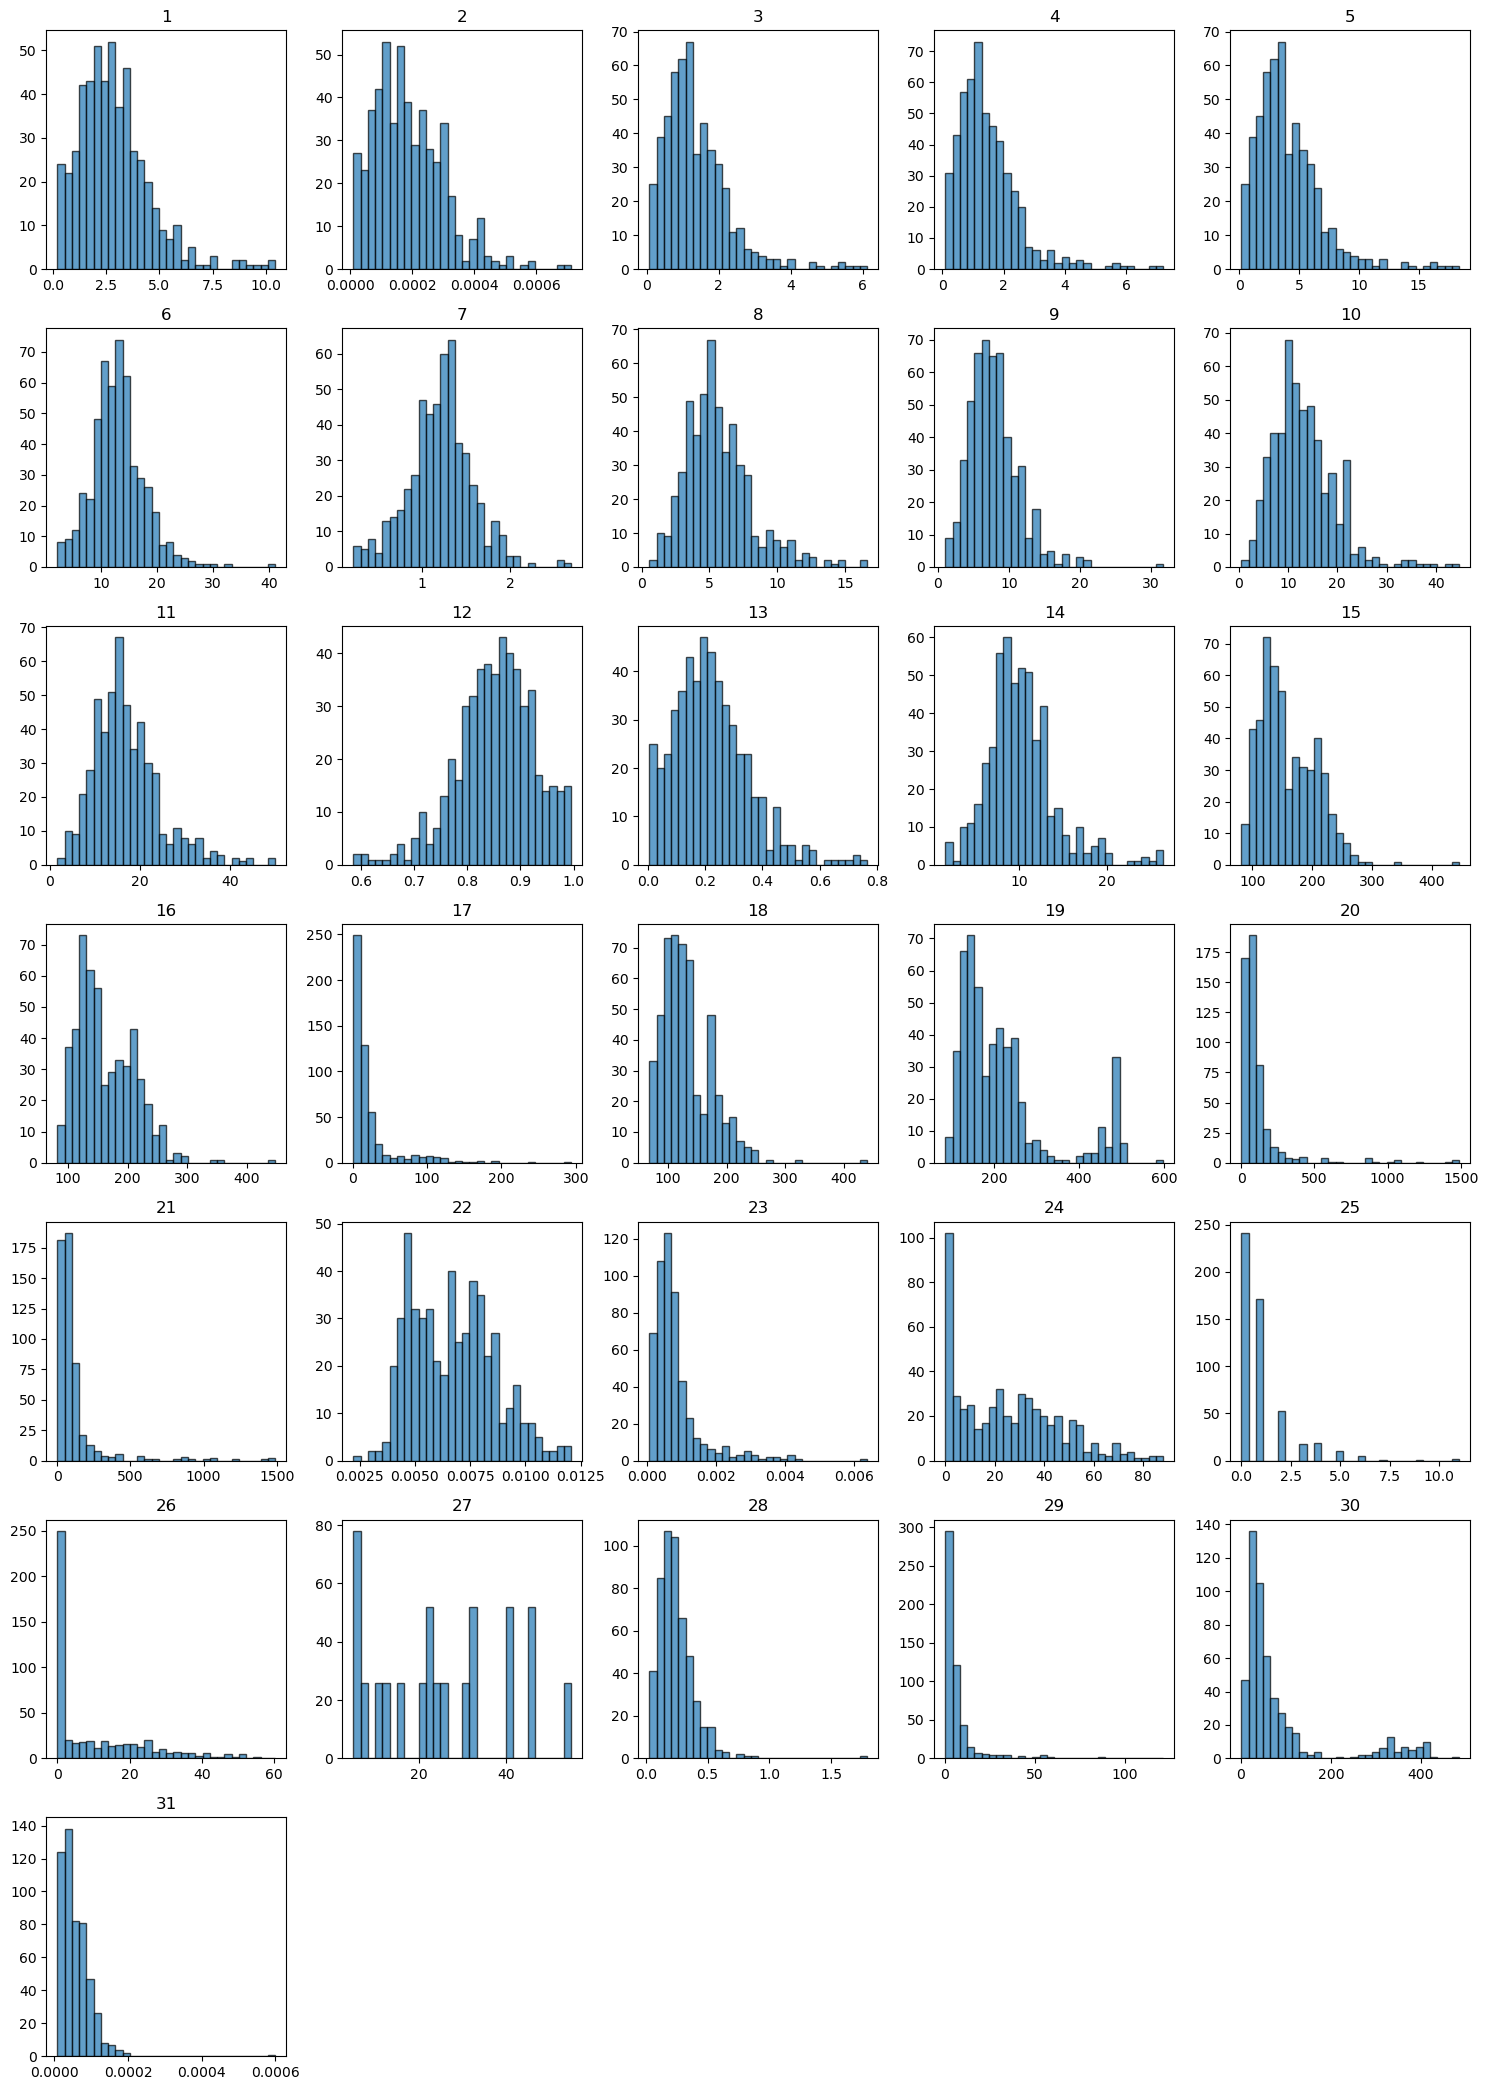

In [20]:
# Plot histograms for sample 1
plot_hist(sample1)

The histograms generated above illustrate that the majority of the data doesn't follow a normal distribution.

However, histograms may not provide the most accurate representation, thus necessitating the use of a normality test to verify the distribution of the data once more.

In [21]:
def normality_test(sample):    
    # D'Agostino's K^2 test:
    for column in sample.columns:
        data = sample[column]
        k2, p = st.normaltest(data)

        print('Column:', column)
        print('k2 =', k2)
        print('p =', p)

        # If p < 0.05, conclude that the data does not follow a normal distribution
        if p < 0.05:
            print('Data is not normally distributed.\n')
        else:
            print('Data is normally distributed.\n')

In [22]:
# Check if data of sample 1 is normally distributed
normality_test(sample1)

Column: 1
k2 = 127.86691693513067
p = 1.7141616654060035e-28
Data is not normally distributed.

Column: 2
k2 = 80.92341140293627
p = 2.6773459118588715e-18
Data is not normally distributed.

Column: 3
k2 = 204.49535897540488
p = 3.930040365820694e-45
Data is not normally distributed.

Column: 4
k2 = 219.90131898611213
p = 1.7743336973123404e-48
Data is not normally distributed.

Column: 5
k2 = 204.48772368279054
p = 3.945072545425653e-45
Data is not normally distributed.

Column: 6
k2 = 92.37850173764573
p = 8.71491638067429e-21
Data is not normally distributed.

Column: 7
k2 = 11.418969605428924
p = 0.0033143796645168392
Data is not normally distributed.

Column: 8
k2 = 102.12011833607279
p = 6.681870550146848e-23
Data is not normally distributed.

Column: 9
k2 = 159.21950201066582
p = 2.666394671064405e-35
Data is not normally distributed.

Column: 10
k2 = 128.37293304895198
p = 1.3309807538050369e-28
Data is not normally distributed.

Column: 11
k2 = 102.11468787627814
p = 6.7000380

#### Use the IBM SPSS Statistics software to test if the data sample 1 is normally distributed.

After utilizing IBM SPSS Statistics software for analysis, and applying two distinct normality tests - the Kolmogorov-Smirnov and Shapiro-Wilk - we found that most of our data (people with Parkinson's Disease) does not conform to a normal distribution. (p-value < 0.05 => reject the idea that our data is normally distributed)

Nevertheless, according to the Central Limit Theorem, the sampling distribution of the mean tends to approximate a normal distribution for sufficiently large sample size, typically considered to be more than 30 observations (520 > 30). This holds true irrespective of the population distribution's shape. Thus, even if our data isn't normally distributed, a t-test might still be appropriate in this context due to our large sample size.

### Inferential statistics

Given the substantial size of our data 520, which is relatively large (>30), in practice, using either the t* or z* value will yield very similar results for the confidence interval. But technically, because the population variance is unknown, it's more appropriate to use the t-statistic (t*).

In [23]:
# Function to calculate confidence interval of data from each column in a sample
def confidence_interval(samp):
    # Iterate over each column in the DataFrame
    for i in range(0, len(samp.columns)):  
        # Select the current column
        sample = samp.iloc[:,i]

        # Sample mean, standard deviation, and sample size
        x_bar = sample.mean()
        s = sample.std()
        n = sample.shape[0]

        # Standard error
        std_err = s / math.sqrt(n)

        # Confidence level, significance level, and degrees of freedom
        conf_lvl = 0.95  # we choose confidence level = 0.95
        sig_lvl = 1 - conf_lvl
        df = n - 1

        # confidence interval with t-distribution
        ci_low_t, ci_upp_t = stm._tconfint_generic(x_bar,std_err,df, alpha=sig_lvl, alternative="two-sided")
        print(f"C.I. for column {i+1} (t*): %.5f to %.5f. Interval size: %.5f." % (ci_low_t, ci_upp_t, ci_upp_t-ci_low_t))

Confidence interval for the average value from data on people with Parkinson's Disease:

In [24]:
confidence_interval(sample1)

C.I. for column 1 (t*): 2.70684 to 2.99641. Interval size: 0.28956.
C.I. for column 2 (t*): 0.00018 to 0.00020. Interval size: 0.00002.
C.I. for column 3 (t*): 1.27682 to 1.43491. Interval size: 0.15809.
C.I. for column 4 (t*): 1.38677 to 1.56241. Interval size: 0.17565.
C.I. for column 5 (t*): 3.83044 to 4.30471. Interval size: 0.47428.
C.I. for column 6 (t*): 12.56196 to 13.37359. Interval size: 0.81163.
C.I. for column 7 (t*): 1.17482 to 1.23781. Interval size: 0.06299.
C.I. for column 8 (t*): 5.43083 to 5.85894. Interval size: 0.42811.
C.I. for column 9 (t*): 7.57157 to 8.17701. Interval size: 0.60544.
C.I. for column 10 (t*): 12.55006 to 13.64046. Interval size: 1.09040.
C.I. for column 11 (t*): 16.29251 to 17.57683. Interval size: 1.28432.
C.I. for column 12 (t*): 0.84659 to 0.85933. Interval size: 0.01274.
C.I. for column 13 (t*): 0.20861 to 0.23114. Interval size: 0.02253.
C.I. for column 14 (t*): 9.83780 to 10.50877. Interval size: 0.67098.
C.I. for column 15 (t*): 154.61678 t

## Part 2: Healthy people

In [25]:
# dataframe of the second part
df2 = df[df[df.columns[-1]] == 0]
df2

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
520,21,0.792,0.000076,0.411,0.333,1.234,4.136,0.391,2.202,2.552,...,0.000203,0.000,0,0.000,1,0.186772,23.479798,11.854,0.000117,0
521,21,0.400,0.000038,0.204,0.228,0.613,11.598,1.019,5.521,7.922,...,0.000101,1.010,0,0.000,1,0.037008,31.000000,5.165,0.000093,0
522,21,0.813,0.000074,0.434,0.437,1.302,17.380,1.473,8.595,10.105,...,0.000123,15.625,4,19.634,1,0.050494,13.143911,5.730,0.000093,0
523,21,1.700,0.000172,0.789,0.929,2.367,7.283,0.723,2.640,3.281,...,0.000494,7.317,0,0.000,1,0.298826,7.230000,19.340,0.000102,0
524,21,1.528,0.000159,0.596,0.698,1.789,8.213,0.902,2.992,4.054,...,0.000823,32.787,1,27.488,1,0.199309,7.763743,32.241,0.000119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,0.001066,24.194,2,15.113,1,0.592308,1.325922,62.446,0.000074,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,0.000430,46.053,1,25.792,1,0.297181,6.383608,22.307,0.000060,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,0.000881,20.000,1,4.574,1,0.177358,3.789492,53.720,0.000065,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,0.001714,16.667,3,19.575,1,0.280238,1.737856,361.315,0.000037,0


In [26]:
# Keep the features columns to analyze, drop the first column and the last column
sample2 = df2.drop(columns= [0, 32])
sample2

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
520,0.792,0.000076,0.411,0.333,1.234,4.136,0.391,2.202,2.552,3.181,...,0.009623,0.000203,0.000,0,0.000,1,0.186772,23.479798,11.854,0.000117
521,0.400,0.000038,0.204,0.228,0.613,11.598,1.019,5.521,7.922,10.267,...,0.009478,0.000101,1.010,0,0.000,1,0.037008,31.000000,5.165,0.000093
522,0.813,0.000074,0.434,0.437,1.302,17.380,1.473,8.595,10.105,10.285,...,0.009150,0.000123,15.625,4,19.634,1,0.050494,13.143911,5.730,0.000093
523,1.700,0.000172,0.789,0.929,2.367,7.283,0.723,2.640,3.281,6.640,...,0.010109,0.000494,7.317,0,0.000,1,0.298826,7.230000,19.340,0.000102
524,1.528,0.000159,0.596,0.698,1.789,8.213,0.902,2.992,4.054,6.916,...,0.010419,0.000823,32.787,1,27.488,1,0.199309,7.763743,32.241,0.000119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,8.303,...,0.007766,0.001066,24.194,2,15.113,1,0.592308,1.325922,62.446,0.000074
1036,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,11.928,...,0.007561,0.000430,46.053,1,25.792,1,0.297181,6.383608,22.307,0.000060
1037,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,14.239,...,0.007767,0.000881,20.000,1,4.574,1,0.177358,3.789492,53.720,0.000065
1038,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,18.818,...,0.007257,0.001714,16.667,3,19.575,1,0.280238,1.737856,361.315,0.000037


### Descriptive statistics
- Measures of Central Tendency: Mean, median
- Measures of Dispersion: Max, min, range, variance, standard deviation
- The Interquartile Range: pct25, pct75, IQR

In [27]:
# Statistics summary of the second sample
sum_stats_sample2 = pd.DataFrame(statistics_summary(sample2))
sum_stats_sample2.iloc[:,0:15]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,2.507421,1.526288e-04,1.138244,1.222062,3.414746,12.869006,1.183479,5.754319,8.092812,11.335434,17.263008,0.839066,0.242882,9.825798,168.084275
std,1.831170,9.602743e-05,1.027124,1.234842,3.081448,6.108741,0.468361,3.467099,5.877320,5.555173,10.401284,0.095614,0.168696,4.651965,63.593442
min,0.190000,6.495000e-06,0.084000,0.081000,0.252000,1.185000,0.103000,0.496000,0.708000,0.982000,1.488000,0.539566,0.002106,0.695000,93.047000
25%,1.381750,8.672825e-05,0.528000,0.578250,1.584000,8.768000,0.887000,3.486500,4.820000,7.504250,10.460500,0.797396,0.125684,7.013500,124.907000
50%,2.214000,1.341150e-04,0.907000,0.967500,2.720000,11.785000,1.138000,4.886500,6.644000,10.775500,14.659500,0.856361,0.206668,9.532000,156.646000
75%,3.052000,2.024693e-04,1.401000,1.467250,4.204000,15.544000,1.412500,7.114000,9.685750,13.724000,21.341250,0.904443,0.307927,12.116000,190.327000
max,14.376000,7.766060e-04,8.016000,13.542000,24.048000,39.874000,2.721000,25.820000,72.860000,41.280000,77.459000,0.997904,0.869277,28.418000,468.618000
median,2.214000,1.341150e-04,0.907000,0.967500,2.720000,11.785000,1.138000,4.886500,6.644000,10.775500,14.659500,0.856361,0.206668,9.532000,156.646000
variance,3.353185,9.221266e-09,1.054984,1.524834,9.495319,37.316713,0.219362,12.020772,34.542885,30.859942,108.186711,0.009142,0.028458,21.640778,4044.125925


In [28]:
sum_stats_sample2.iloc[:,15:31]

,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02,520.000000,520.000000,520.000000,520.0,520.000000,520.000000,520.000000,5.200000e+02
mean,174.504873,31.985604,137.318069,251.810481,103.590385,98.934615,0.006393,8.850162e-04,30.241529,1.263462,14.281812,1.0,0.214578,8.583052,114.492412,4.992557e-05
std,61.861037,38.402826,50.772821,130.511785,114.500269,113.041041,0.001872,7.075777e-04,20.994251,1.739768,16.231924,0.0,0.159542,15.630565,122.352831,5.969497e-05
min,93.447000,0.626000,70.502000,100.010000,5.000000,4.000000,0.002039,5.715600e-05,0.000000,0.000000,0.000000,1.0,0.019641,0.057040,1.934000,3.506104e-06
25%,129.326000,7.797000,101.172500,148.153000,42.750000,40.000000,0.005035,4.280397e-04,11.111000,0.000000,0.000000,1.0,0.113878,2.413295,30.467500,2.219228e-05
50%,162.301500,14.972000,128.539500,202.064500,62.000000,58.500000,0.006147,6.630800e-04,29.992000,1.000000,8.863500,1.0,0.184129,3.868756,56.836000,3.774467e-05
75%,204.517000,35.996750,160.407750,323.134000,118.000000,111.250000,0.007754,1.053457e-03,47.219500,2.000000,25.478000,1.0,0.272056,7.605696,135.365500,6.472068e-05
max,470.456000,162.396000,452.083000,526.410000,805.000000,798.000000,0.010837,4.074831e-03,85.000000,12.000000,69.117000,1.0,2.137518,149.568421,415.493000,1.198765e-03
median,162.301500,14.972000,128.539500,202.064500,62.000000,58.500000,0.006147,6.630800e-04,29.992000,1.000000,8.863500,1.0,0.184129,3.868756,56.836000,3.774467e-05
variance,3826.787864,1474.777066,2577.879394,17033.326015,13110.311661,12778.277027,0.000004,5.006661e-07,440.758583,3.026793,263.475353,0.0,0.025454,244.314553,14970.215169,3.563489e-09


- Distributions of Data: Use histograms displaying the distribution of continuous data

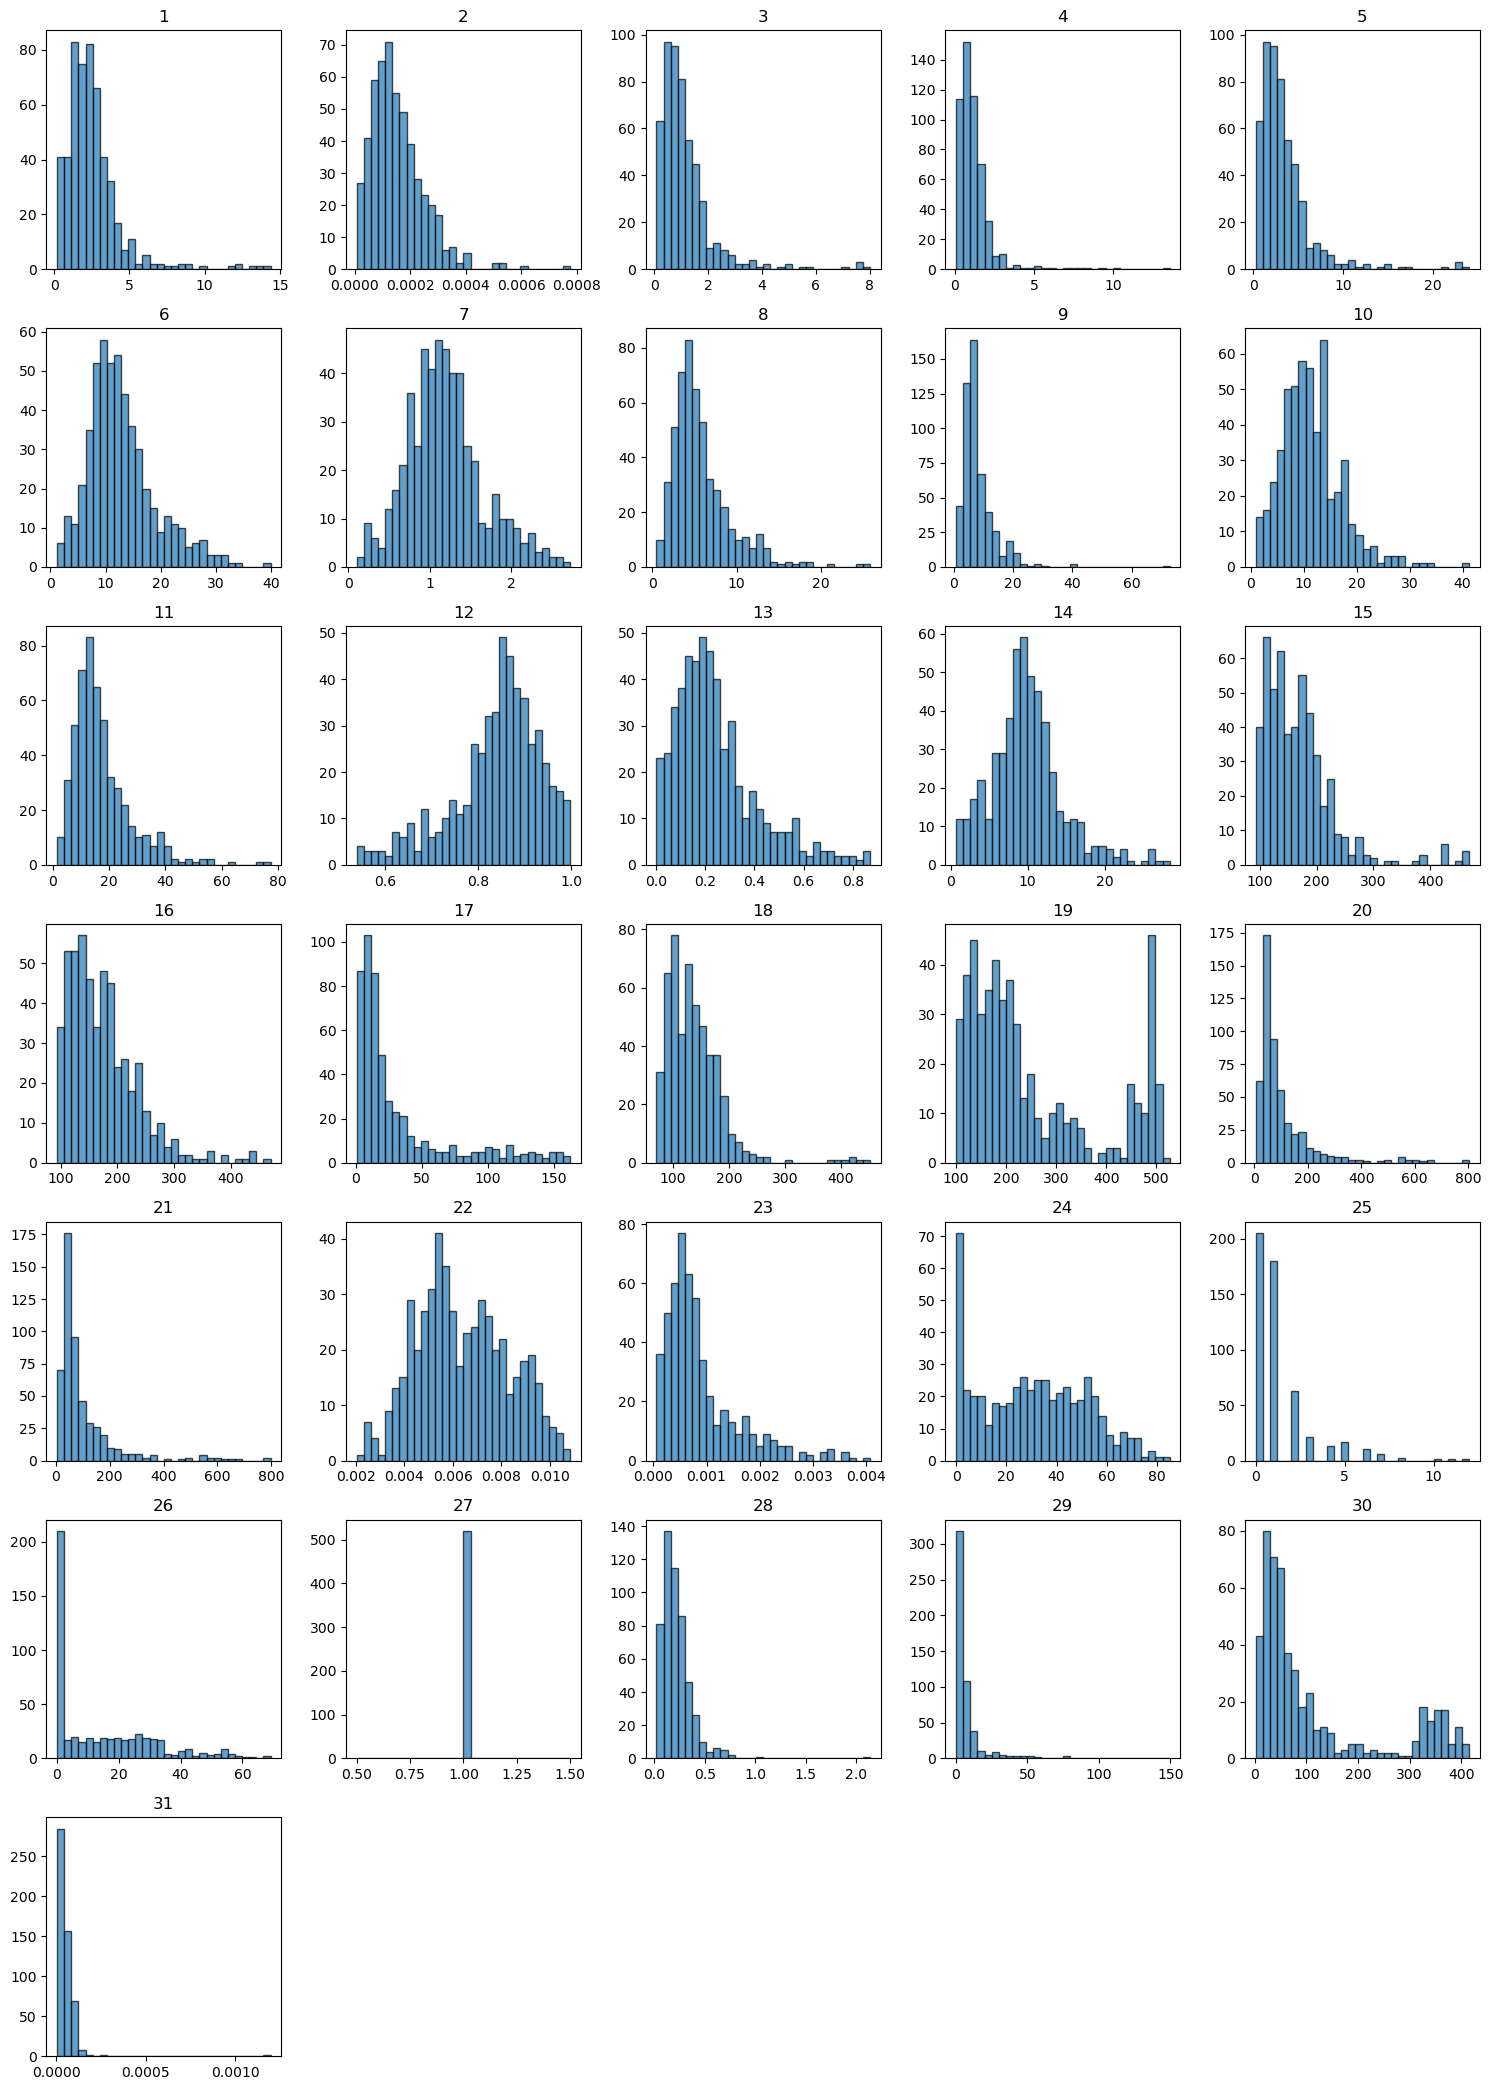

In [29]:
# Plot histograms for sample 2
plot_hist(sample2)

The histograms generated above illustrate that the majority of the data doesn't follow a normal distribution.

However, histograms may not provide the most accurate representation, thus necessitating the use of a normality test to verify the distribution of the data once more.

In [30]:
# Check if data of sample 2 is normally distributed
normality_test(sample2)

Column: 1
k2 = 346.0046399437008
p = 7.345934975696704e-76
Data is not normally distributed.

Column: 2
k2 = 177.51284036617588
p = 2.8416885736663058e-39
Data is not normally distributed.

Column: 3
k2 = 401.4692492453861
p = 6.638350810876418e-88
Data is not normally distributed.

Column: 4
k2 = 542.4938745163853
p = 1.58107297570735e-118
Data is not normally distributed.

Column: 5
k2 = 401.4673863620453
p = 6.644536928000633e-88
Data is not normally distributed.

Column: 6
k2 = 80.21305307851449
p = 3.819063114813341e-18
Data is not normally distributed.

Column: 7
k2 = 25.840681385469384
p = 2.4477515420280057e-06
Data is not normally distributed.

Column: 8
k2 = 206.55729399189676
p = 1.4016949582298564e-45
Data is not normally distributed.

Column: 9
k2 = 488.75315842932014
p = 7.389246263929612e-107
Data is not normally distributed.

Column: 10
k2 = 99.41790761306699
p = 2.580332429651841e-22
Data is not normally distributed.

Column: 11
k2 = 206.54957174857327
p = 1.4071175348

C:\Users\Admin\anaconda3\envs\hit140env\Lib\site-packages\scipy\stats\_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
C:\Users\Admin\anaconda3\envs\hit140env\Lib\site-packages\scipy\stats\_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)


#### Use the IBM SPSS Statistics software to test if the data from sample 2 is normally distributed.

After utilizing IBM SPSS Statistics software for analysis, and applying two distinct normality tests - the Kolmogorov-Smirnov and Shapiro-Wilk - we found that most of our data (healthy people) does not conform to a normal distribution. (p-value < 0.05 => reject the idea that our data is normally distributed)

Nevertheless, according to the Central Limit Theorem, the sampling distribution of the mean tends to approximate a normal distribution for sufficiently large sample size, typically considered to be more than 30 observations (520 > 30). This holds true irrespective of the population distribution's shape. Thus, even if our data isn't normally distributed, a t-test might still be appropriate in this context due to our large sample size.

### Inferential statistics

Given the substantial size of our data 520, which is relatively large (>30), in practice, using either the t* or z* value will yield very similar results for the confidence interval. But technically, because the population variance is unknown, it's more appropriate to use the t-statistic (t*).

Confidence interval for the average value from data on healthy people:

In [31]:
confidence_interval(sample2)

C.I. for column 1 (t*): 2.34966 to 2.66518. Interval size: 0.31551.
C.I. for column 2 (t*): 0.00014 to 0.00016. Interval size: 0.00002.
C.I. for column 3 (t*): 1.04976 to 1.22673. Interval size: 0.17698.
C.I. for column 4 (t*): 1.11568 to 1.32845. Interval size: 0.21277.
C.I. for column 5 (t*): 3.14928 to 3.68022. Interval size: 0.53094.
C.I. for column 6 (t*): 12.34273 to 13.39528. Interval size: 1.05255.
C.I. for column 7 (t*): 1.14313 to 1.22383. Interval size: 0.08070.
C.I. for column 8 (t*): 5.45562 to 6.05301. Interval size: 0.59739.
C.I. for column 9 (t*): 7.58648 to 8.59915. Interval size: 1.01267.
C.I. for column 10 (t*): 10.85685 to 11.81402. Interval size: 0.95717.
C.I. for column 11 (t*): 16.36693 to 18.15909. Interval size: 1.79216.
C.I. for column 12 (t*): 0.83083 to 0.84730. Interval size: 0.01647.
C.I. for column 13 (t*): 0.22835 to 0.25742. Interval size: 0.02907.
C.I. for column 14 (t*): 9.42503 to 10.22657. Interval size: 0.80154.
C.I. for column 15 (t*): 162.60564 t

## Using statistical hypothesis testing as a method for feature selection

In this scenario, the population mean µ and population standard deviation σ are unknown, so we will sibstitute s/√n for the unknown σ. Therefore, the t-distributions should be used.

##### We will perform two-sample t-test

- We'll apply one-sided test alternative='greater' or 'less' or 'two-sided' test with these variables below:

Column:
1. Jitter in %: 'greater' - PD patients typically show increased jitter due to voice tremors and reduced motor control of the vocal folds.

2. Absolute jitter in microseconds: 'greater' - Similar reasoning as above.

3. Jitter as relative amplitude perturbation (r.a.p.): 'greater' - It represents variability, which is often higher in PD voices.

4. Jitter as 5-point period perturbation quotient (p.p.q.5): 'greater' - Another measure of variability, likely higher in PD.

5. Jitter as average absolute difference of differences between jitter cycles (d.d.p.): 'greater' - Increased instability in PD voice leads to a greater value.

6. Shimmer in %: 'greater' - Increased amplitude variability in PD voices.

7. Absolute shimmer in decibels (dB): 'greater' - Amplitude instability is a characteristic of PD voice.

8. Shimmer as 3-point amplitude perturbation quotient (a.p.q.3): 'greater' - As with other shimmer measures, PD tends to increase variability.

9. Shimmer as 5-point amplitude perturbation quotient (a.p.q.5): 'greater' - PD leads to increased amplitude variability.

10. Shimmer as 11-point amplitude perturbation quotient (a.p.q.11): 'greater' - PD causes increased amplitude perturbations.

11. Shimmer as average absolute differences between consecutive differences between the amplitudes of shimmer cycles (d.d.a.): 'greater' - Reflects amplitude irregularities which are characteristic of PD.

12. Autocorrelation between NHR and HNR: 'two-sided' - The relationship between these two parameters and its relevance to PD isn't immediately clear. Thus, a two-sided test is appropriate.

13. Noise-to-Harmonic ratio (NHR): 'greater' - PD voices are expected to have more noise due to turbulent airflow and imperfect vocal fold closure.

14. Harmonic-to-Noise ratio (HNR): 'less' - A lower HNR implies more noise, which is typical in PD voices.

15. Median pitch: 'two-sided' - PD can affect pitch, but its exact direction can vary between individuals.

16. Mean pitch: 'two-sided' - Similar reasoning as above.

17. Standard deviation of pitch: 'greater' - Increased pitch variability in PD.

18. Minimum pitch: 'two-sided' - Might vary based on the individual.

19. Maximum pitch: 'two-sided' - Also might vary.

20. Number of pulses: 'two-sided' - Uncertain without specific context.

21. Number of periods: 'two-sided' - Similarly uncertain.

22. Mean period: 'two-sided' - Can vary among PD patients.

23. Standard deviation of period: 'greater' - PD likely leads to increased variability.

24. Fraction of unvoiced frames: 'greater' - PD might result in more unvoiced moments due to vocal fold control issues.

25. Number of voice breaks: 'greater' - PD can cause intermittent loss of voicing or voice breaks.

26. Degree of voice breaks: 'greater' - The extent of these breaks might be more pronounced in PD.

27. The Unified Parkinson’s Disease Rating Scale (UPDRS): 'greater' - Higher scores indicate more severe symptoms of PD.

28. jitter-shimmer-difference ratio: 'greater' - With increased jitter and shimmer in PD, this ratio is likely to be higher.

29. Harmonicity-to-Jitter ratio: 'less' - Given that PD might decrease harmonicity (HNR) and increase jitter, the ratio is expected to be lower.

30. Pitch range: 'two-sided' - PD can affect the pitch range, but the exact direction can vary.

31. Pulse-to-Pitch ratio: 'greater' - PD likely increases period variability relative to pitch variability.

BENBA, A., JILBAB, A. & HAMMOUCH, A. 2016. Voice analysis for detecting patients with Parkinson's disease using the hybridization of the best acoustic features. International Journal on Electrical Engineering and Informatics, 8, 108.

### Approach 1: Split the dataset into 2 parts (people with PD and healthy people)

In [32]:
# Create an empty list to store all variables that are selected after doing statistical hypothesis testing
selected_columns = []

In [33]:
def hypothesis_testing(df1, df2, mode):    
    # iterate over all columns
    for i in range(df1.shape[1]):
        # select relevant column from each DataFrame
        sample1 = df1.iloc[:,i].to_numpy()
        sample2 = df2.iloc[:,i].to_numpy()

        print(f"\n Column {df1.columns[i]}:")

        # the basic statistics of sample 1:
        x_bar1 = st.tmean(sample1)
        s1 = st.tstd(sample1)
        n1 = len(sample1)
        print("\t Statistics of sample 1: %.5f (mean), %.5f (std. dev.), and %d (n)." % (x_bar1, s1, n1))

        # the basic statistics of sample 2:
        x_bar2 = st.tmean(sample2)
        s2 = st.tstd(sample2)
        n2 = len(sample2)
        print("\t Statistics of sample 2: %.5f (mean), %.5f (std. dev.), and %d (n)." % (x_bar2, s2, n2))

        # perform two-sample t-test
        # null hypothesis: mean of sample 1 = mean of sample 2
        # alternative hypothesis: mean of sample 1 is # greater or less than mean of sample 2 (one-sided test)
                                                      # or different from mean of sample 2 (two-sided test)
        # note the argument equal_var=False, which assumes that two populations do not have equal variance
        t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative=mode)
        print("\t t-statistic (t*): %.2f" % t_stats)
        print("\t p-value: %.8f" % p_val)
        print("\n Conclusion:")
        if p_val < 0.05:
            print(f"\t We REJECT the null hypothesis. => Select column {df1.columns[i]} to distinguish people with PD and healthy people.")
            selected_columns.append(df1.columns[i])
        else:
            print("\t We accept the null hypothesis.")

##### alternative = 'greater'

In [34]:
# Create a new dataframe from the columns of sample 1 where the alternative is 'greater'
greater_df1 = sample1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,22,23,24,25,26,27,30]]
greater_df1.head()

,1,2,3,4,5,6,7,8,9,10,11,13,23,24,25,26,27,28,31
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,13.551,0.119116,0.000416,0.000,0,0.000,23,0.199173,0.000040
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,6.175,0.066758,0.000403,2.247,0,0.000,23,0.171498,0.000027
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,13.040,0.109983,0.000474,10.656,1,0.178,23,0.168405,0.000037
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,15.789,0.121982,0.000320,0.000,0,0.000,23,0.219710,0.000029
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,9.307,0.236831,0.000380,18.182,1,13.318,23,0.552810,0.000033


In [35]:
# Create a new dataframe from the columns of sample 2 where the alternative is 'greater'
greater_df2 = sample2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,22,23,24,25,26,27,30]]
greater_df2.head()

,1,2,3,4,5,6,7,8,9,10,11,13,23,24,25,26,27,28,31
520,0.792,0.000076,0.411,0.333,1.234,4.136,0.391,2.202,2.552,3.181,6.607,0.035008,0.000203,0.000,0,0.000,1,0.186772,0.000117
521,0.400,0.000038,0.204,0.228,0.613,11.598,1.019,5.521,7.922,10.267,16.564,0.110158,0.000101,1.010,0,0.000,1,0.037008,0.000093
522,0.813,0.000074,0.434,0.437,1.302,17.380,1.473,8.595,10.105,10.285,25.785,0.196358,0.000123,15.625,4,19.634,1,0.050494,0.000093
523,1.700,0.000172,0.789,0.929,2.367,7.283,0.723,2.640,3.281,6.640,7.921,0.127654,0.000494,7.317,0,0.000,1,0.298826,0.000102
524,1.528,0.000159,0.596,0.698,1.789,8.213,0.902,2.992,4.054,6.916,8.976,0.126948,0.000823,32.787,1,27.488,1,0.199309,0.000119


In [36]:
# Call function to do hypothesis testing
hypothesis_testing(greater_df1, greater_df2, 'greater')


 Column 1:
	 Statistics of sample 1: 2.85162 (mean), 1.68056 (std. dev.), and 520 (n).
	 Statistics of sample 2: 2.50742 (mean), 1.83117 (std. dev.), and 520 (n).
	 t-statistic (t*): 3.16
	 p-value: 0.00081739

 Conclusion:
	 We REJECT the null hypothesis. => Select column 1 to distinguish people with PD and healthy people.

 Column 2:
	 Statistics of sample 1: 0.00019 (mean), 0.00011 (std. dev.), and 520 (n).
	 Statistics of sample 2: 0.00015 (mean), 0.00010 (std. dev.), and 520 (n).
	 t-statistic (t*): 5.46
	 p-value: 0.00000003

 Conclusion:
	 We REJECT the null hypothesis. => Select column 2 to distinguish people with PD and healthy people.

 Column 3:
	 Statistics of sample 1: 1.35586 (mean), 0.91751 (std. dev.), and 520 (n).
	 Statistics of sample 2: 1.13824 (mean), 1.02712 (std. dev.), and 520 (n).
	 t-statistic (t*): 3.60
	 p-value: 0.00016474

 Conclusion:
	 We REJECT the null hypothesis. => Select column 3 to distinguish people with PD and healthy people.

 Column 4:
	 Stati

##### alternative = 'less'

In [37]:
# Create a new dataframe from the columns of sample 1 where the alternative is 'less'
less_df1 = sample1.iloc[:,[13,28]]
less_df1.head()

,14,29
0,11.130,7.479839
1,17.403,23.905220
2,12.212,10.009836
3,11.384,4.549960
4,10.653,3.035908


In [38]:
# Create a new dataframe from the columns of sample 2 where the alternative is 'less'
less_df2 = sample2.iloc[:,[13,28]]
less_df2.head()

,14,29
520,18.596,23.479798
521,12.400,31.000000
522,10.686,13.143911
523,12.291,7.230000
524,11.863,7.763743


In [39]:
# Call function to do hypothesis testing
hypothesis_testing(less_df1, less_df2, 'less')


 Column 14:
	 Statistics of sample 1: 10.17329 (mean), 3.89420 (std. dev.), and 520 (n).
	 Statistics of sample 2: 9.82580 (mean), 4.65196 (std. dev.), and 520 (n).
	 t-statistic (t*): 1.31
	 p-value: 0.90409530

 Conclusion:
	 We accept the null hypothesis.

 Column 29:
	 Statistics of sample 1: 7.55988 (mean), 13.12529 (std. dev.), and 520 (n).
	 Statistics of sample 2: 8.58305 (mean), 15.63056 (std. dev.), and 520 (n).
	 t-statistic (t*): -1.14
	 p-value: 0.12662832

 Conclusion:
	 We accept the null hypothesis.


##### alternative = 'two-sided'

In [40]:
# Create a new dataframe from the columns of sample 1 where the alternative is 'two-sided'
two_sided_df1 = sample1.iloc[:,[11,14,15,16,17,18,19,20,21,29]]
two_sided_df1.head()

,12,15,16,17,18,19,20,21,22,30
0,0.905905,166.533,164.781,10.421,142.229,187.576,160,159,0.006065,45.347
1,0.951285,195.252,193.289,14.773,159.515,234.505,170,169,0.005181,74.990
2,0.911508,158.689,164.768,12.981,146.445,211.442,1431,1427,0.006071,64.997
3,0.901302,201.997,203.471,10.853,182.713,220.230,94,92,0.004910,37.517
4,0.856907,211.887,208.440,11.499,182.821,225.162,117,114,0.004757,42.341


In [41]:
# Create a new dataframe from the columns of sample 2 where the alternative is 'two-sided'
two_sided_df2 = sample2.iloc[:,[11,14,15,16,17,18,19,20,21,29]]
two_sided_df2.head()

,12,15,16,17,18,19,20,21,22,30
520,0.972431,103.774,103.862,1.730,98.743,110.597,147,146,0.009623,11.854
521,0.911465,105.271,105.500,1.083,103.224,108.389,105,104,0.009478,5.165
522,0.866896,108.954,109.202,1.316,107.359,113.089,62,56,0.009150,5.730
523,0.905239,100.527,98.816,4.838,87.466,106.806,38,37,0.010109,19.340
524,0.904242,97.658,96.255,6.928,75.054,107.295,41,39,0.010419,32.241


In [42]:
# Call function to do hypothesis testing
hypothesis_testing(two_sided_df1, two_sided_df2, 'two-sided')


 Column 12:
	 Statistics of sample 1: 0.85296 (mean), 0.07394 (std. dev.), and 520 (n).
	 Statistics of sample 2: 0.83907 (mean), 0.09561 (std. dev.), and 520 (n).
	 t-statistic (t*): 2.62
	 p-value: 0.00889474

 Conclusion:
	 We REJECT the null hypothesis. => Select column 12 to distinguish people with PD and healthy people.

 Column 15:
	 Statistics of sample 1: 158.65230 (mean), 46.84241 (std. dev.), and 520 (n).
	 Statistics of sample 2: 168.08428 (mean), 63.59344 (std. dev.), and 520 (n).
	 t-statistic (t*): -2.72
	 p-value: 0.00658448

 Conclusion:
	 We REJECT the null hypothesis. => Select column 15 to distinguish people with PD and healthy people.

 Column 16:
	 Statistics of sample 1: 162.95037 (mean), 48.76093 (std. dev.), and 520 (n).
	 Statistics of sample 2: 174.50487 (mean), 61.86104 (std. dev.), and 520 (n).
	 t-statistic (t*): -3.35
	 p-value: 0.00085375

 Conclusion:
	 We REJECT the null hypothesis. => Select column 16 to distinguish people with PD and healthy people.

In [43]:
print(f"There are {len(selected_columns)} columns that have been selected.\nThey are: ", sorted(selected_columns), end = "")

There are 16 columns that have been selected.
They are:  [1, 2, 3, 4, 5, 10, 12, 15, 16, 17, 19, 22, 27, 28, 30, 31]

In conclusion, we've selected the measurements below, which correspond to their respective columns, from four features to distinguish between individuals with Parkinson's Disease and those who are healthy:
- Jitter (%, abs, rap, ppq5, ddp)
- Shimmer (apq11)
- Harmonicity (autocorrelation between NHR and HNR)
- Pitch (median, mean, standard deviation, max, range)
- Pulse (mean period)
- Jitter-Shimmer-difference ratio
- Pulse-to-Pitch ratio
- The Unified Parkinson's Disease Rating Scale (UPDRS)

### Approach 2: Split the dataset into 26 subsets

Assuming the initial recording from both subject 1 and subject 2 represents the same kind of voice sample, and this pattern holds true for subsequent recordings in sequence. Our goal is to identify key features within each voice sample type that can differentiate between individuals with Parkinson's disease and those without.

In [44]:
# Divide the datdaset into 26 subsets
subsets = []

for i in range(26):
    # Extracting every 26th row from sample1 and sample2
    subset1 = sample1.iloc[i::26, :]
    subset2 = sample2.iloc[i::26, :]
    
    # Combining them
    merged_subset = pd.concat([subset1, subset2], axis=0)
    subsets.append(merged_subset)

# Now, subsets[0] is the first combined subset, subsets[1] is the second combined subset, and so on...

Now, each dataframe in the subsets list will have 40 rows (20 from sample1 and 20 from sample2) and 31 columns.

In [45]:
# For example, this is the first subset:
subsets[0]

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,0.006065,0.000416,0.000,0,0.000,23,0.199173,7.479839,45.347,0.000040
26,0.427,0.000034,0.243,0.249,0.728,7.428,0.694,4.205,4.311,5.250,...,0.008073,0.000143,0.000,0,0.000,8,0.057705,35.754098,10.744,0.000066
52,1.493,0.000064,0.912,0.822,2.735,11.521,1.068,5.552,7.495,10.720,...,0.004270,0.000279,0.000,0,0.000,40,0.164195,7.196249,48.394,0.000019
78,0.607,0.000025,0.357,0.378,1.071,9.491,0.887,5.349,5.733,6.450,...,0.004061,0.000060,0.000,0,0.000,5,0.066741,22.161450,14.175,0.000019
104,0.695,0.000057,0.386,0.394,1.159,17.582,1.593,9.968,11.287,15.725,...,0.008237,0.000299,0.752,0,0.000,16,0.038756,13.008633,17.102,0.000069
130,0.382,0.000027,0.177,0.238,0.532,5.219,0.468,2.589,2.890,4.646,...,0.007078,0.000081,0.000,0,0.000,46,0.068486,43.678010,7.883,0.000052
156,0.630,0.000042,0.192,0.251,0.576,5.659,0.547,2.546,3.454,5.046,...,0.006663,0.000478,0.000,0,0.000,40,0.075422,28.866667,45.656,0.000046
182,0.594,0.000043,0.325,0.303,0.976,5.300,0.516,2.833,3.100,4.236,...,0.007164,0.000344,0.000,0,0.000,20,0.114837,25.792929,30.855,0.000051
208,0.449,0.000035,0.165,0.198,0.495,3.616,0.320,1.401,2.298,4.359,...,0.007758,0.000272,0.000,0,0.000,11,0.117801,45.603563,21.583,0.000066
234,0.888,0.000092,0.352,0.435,1.057,5.995,0.604,2.757,3.522,5.367,...,0.010401,0.000781,5.455,0,0.000,12,0.127811,16.259009,36.610,0.000107


In [46]:
def hypothesis_testing_subset(df1, df2, mode):
    # Local list to store selected columns for the current subset
    subset_selected_columns = []
    
    # iterate over all columns
    for i in range(df1.shape[1]):
        # select relevant column from each DataFrame
        sample1 = df1.iloc[:,i].to_numpy()
        sample2 = df2.iloc[:,i].to_numpy()

        # perform two-sample t-test
        x_bar1 = st.tmean(sample1)
        s1 = st.tstd(sample1)
        n1 = len(sample1)

        x_bar2 = st.tmean(sample2)
        s2 = st.tstd(sample2)
        n2 = len(sample2)

        t_stats, p_val = st.ttest_ind_from_stats(x_bar1, s1, n1, x_bar2, s2, n2, equal_var=False, alternative=mode)

        if p_val < 0.05:
            subset_selected_columns.append(df1.columns[i])

    # Print selected columns for the current subset
    print(f"\nSelected columns for this subset: {subset_selected_columns}")

In [47]:
# Function to split each subset into df1 (people with PD) and df2 (healthy people)
def create_dfs_based_on_mode(subset, mode_columns):
    # Split the subset into subset1 and subset2
    subset1 = subset.iloc[0:20]
    subset2 = subset.iloc[20:40]
    
    # Extract columns based on the mode_columns parameter
    df1 = subset1.iloc[:, mode_columns]
    df2 = subset2.iloc[:, mode_columns]
    
    return df1, df2

##### alternative = 'greater'

In [48]:
# Columns for the 'greater' mode
greater_columns = [0,1,2,3,4,5,6,7,8,9,10,12,22,23,24,25,26,27,30]

# Looping through all subsets
for index, subset in enumerate(subsets, 1):  # Added enumeration for better clarity on which subset we're analyzing
    print(f"\nProcessing subset {index}...")
    df1, df2 = create_dfs_based_on_mode(subset, greater_columns)
    
    # Call function to do hypothesis testing
    hypothesis_testing_subset(df1, df2, 'greater')


Processing subset 1...

Selected columns for this subset: [27]

Processing subset 2...

Selected columns for this subset: [27]

Processing subset 3...

Selected columns for this subset: [27]

Processing subset 4...

Selected columns for this subset: [1, 2, 3, 4, 5, 27]

Processing subset 5...

Selected columns for this subset: [1, 2, 8, 9, 10, 11, 27]

Processing subset 6...

Selected columns for this subset: [27]

Processing subset 7...

Selected columns for this subset: [1, 2, 3, 4, 5, 10, 27, 28]

Processing subset 8...

Selected columns for this subset: [27]

Processing subset 9...

Selected columns for this subset: [10, 27]

Processing subset 10...

Selected columns for this subset: [27]

Processing subset 11...

Selected columns for this subset: [9, 27]

Processing subset 12...

Selected columns for this subset: [27, 28]

Processing subset 13...

Selected columns for this subset: [2, 23, 27, 28]

Processing subset 14...

Selected columns for this subset: [27]

Processing subset 

##### alternative = 'less'

In [49]:
# Columns for the 'less' mode
less_columns = [13,28]

# Looping through all subsets
for index, subset in enumerate(subsets, 1):  # Added enumeration for better clarity on which subset we're analyzing
    print(f"\nProcessing subset {index}...")
    df1, df2 = create_dfs_based_on_mode(subset, less_columns)
    
    # Call function to do hypothesis testing
    hypothesis_testing_subset(df1, df2, 'less')


Processing subset 1...

Selected columns for this subset: []

Processing subset 2...

Selected columns for this subset: []

Processing subset 3...

Selected columns for this subset: []

Processing subset 4...

Selected columns for this subset: []

Processing subset 5...

Selected columns for this subset: []

Processing subset 6...

Selected columns for this subset: []

Processing subset 7...

Selected columns for this subset: [29]

Processing subset 8...

Selected columns for this subset: []

Processing subset 9...

Selected columns for this subset: []

Processing subset 10...

Selected columns for this subset: []

Processing subset 11...

Selected columns for this subset: []

Processing subset 12...

Selected columns for this subset: []

Processing subset 13...

Selected columns for this subset: []

Processing subset 14...

Selected columns for this subset: []

Processing subset 15...

Selected columns for this subset: []

Processing subset 16...

Selected columns for this subset: []

##### alternative = 'two-sided'

In [50]:
# Columns for the 'two-sided' mode
two_sided_columns = [11,14,15,16,17,18,19,20,21,29]

# Looping through all subsets
for index, subset in enumerate(subsets, 1):  # Added enumeration for better clarity on which subset we're analyzing
    print(f"\nProcessing subset {index}...")
    df1, df2 = create_dfs_based_on_mode(subset, two_sided_columns)
    
    # Call function to do hypothesis testing
    hypothesis_testing_subset(df1, df2, 'two-sided')


Processing subset 1...

Selected columns for this subset: []

Processing subset 2...

Selected columns for this subset: [30]

Processing subset 3...

Selected columns for this subset: []

Processing subset 4...

Selected columns for this subset: []

Processing subset 5...

Selected columns for this subset: []

Processing subset 6...

Selected columns for this subset: [17, 19, 30]

Processing subset 7...

Selected columns for this subset: []

Processing subset 8...

Selected columns for this subset: []

Processing subset 9...

Selected columns for this subset: []

Processing subset 10...

Selected columns for this subset: []

Processing subset 11...

Selected columns for this subset: []

Processing subset 12...

Selected columns for this subset: []

Processing subset 13...

Selected columns for this subset: []

Processing subset 14...

Selected columns for this subset: []

Processing subset 15...

Selected columns for this subset: []

Processing subset 16...

Selected columns for this 

Finally, we determine the appropriate feature sets for each subset by referencing the "Description of variables" table to understand the significance of the chosen columns. These features are then selected for each type of voice sample to differentiate between individuals with Parkinson's disease and those who are healthy.

After considering the results of all subsets, these are good voice samples (>= 2 features selected) that could be used to distinguish people having Parkinson's disease and healthy people:
4, 5, 6, 7, 9, 11, 12, 13, 15, 17, 18, 19, 20, 21, 23, 25, 26